In [37]:
from collections import OrderedDict
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

data_train = pd.read_csv("./../data/train.csv")
data_test = pd.read_csv("./../data/test.csv")
data_all = pd.concat([data_train, data_test], ignore_index=True)

In [38]:
print "Missing data train set:"
miss = len(data_train.index) - data_train.count()
print 1. * miss / len(data_train.index) 

Missing data train set:
PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64


In [39]:
print "Missing data test set:"
miss = len(data_test.index) - data_test.count()
print 1. * miss / len(data_test.index)

Missing data test set:
PassengerId    0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.205742
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.002392
Cabin          0.782297
Embarked       0.000000
dtype: float64


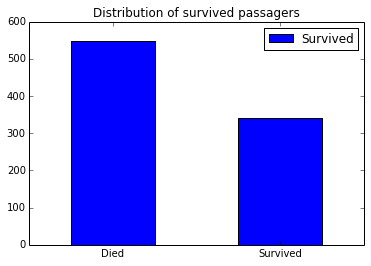

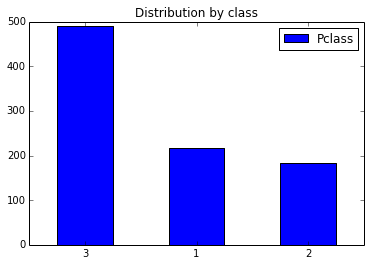

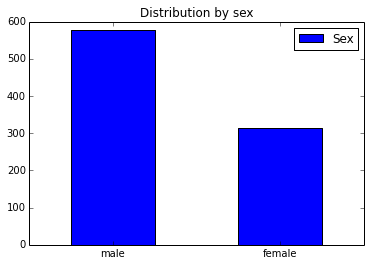

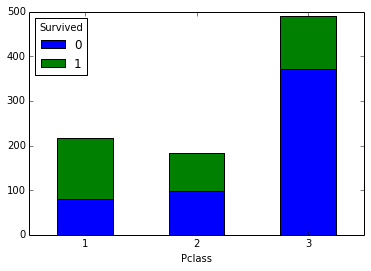

In [40]:
# should create multiple data frames to have multiple plots
survived = pd.DataFrame( data_train.Survived.value_counts() )
survived.index = ["Died", "Survived"]
survived.plot(kind="bar", rot=0, title="Distribution of survived passagers")

pclass = pd.DataFrame( data_train.Pclass.value_counts() )
pclass.plot(kind="bar", rot=0, title="Distribution by class")

sex = pd.DataFrame( data_train.Sex.value_counts() )
sex.plot(kind="bar", rot=0, title="Distribution by sex")

d = data_train.groupby(["Pclass", "Survived"]).size()
d = d.unstack()
d.plot(kind="bar", rot=0, stacked=True)

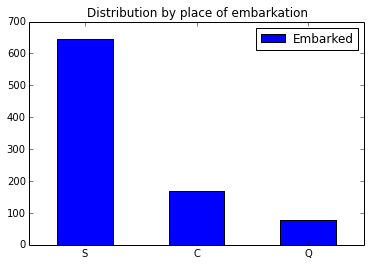

In [41]:
# Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)
# 2 NA
s = data_train.Embarked
s.fillna(s.value_counts().idxmax(), inplace=True)
embarked = pd.DataFrame( data_train.Embarked.value_counts() )
embarked.plot(kind="bar", rot=0, title="Distribution by place of embarkation")

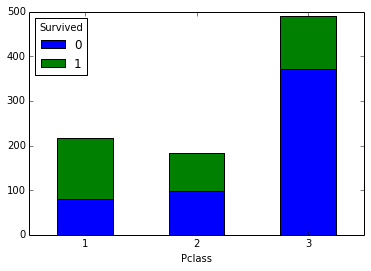

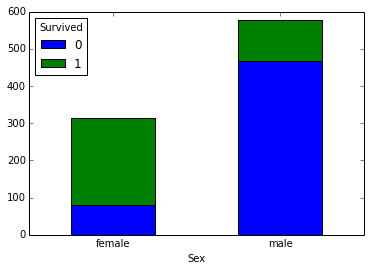

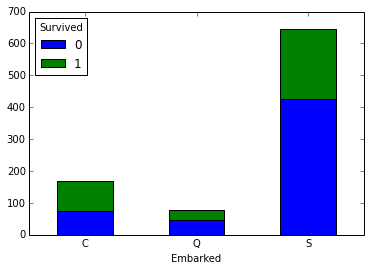

In [42]:
# feature distribution + survival

d = data_train.groupby(["Pclass", "Survived"]).size()
d = d.unstack()
d.plot(kind="bar", rot=0, stacked=True)

d = data_train.groupby(["Sex", "Survived"]).size()
d = d.unstack()
d.plot(kind="bar", rot=0, stacked=True)

d = data_train.groupby(["Embarked", "Survived"]).size()
d = d.unstack()
d.plot(kind="bar", rot=0, stacked=True)


In [107]:
print len(data_all[data_all['Embarked'].isnull()])
print data_all.Embarked.unique()

2
['S' 'C' 'Q' nan]


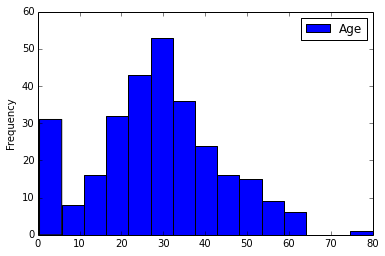

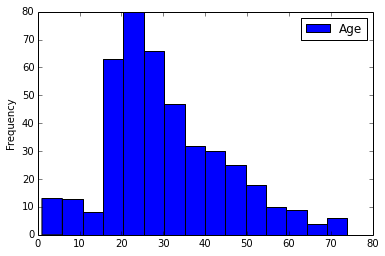

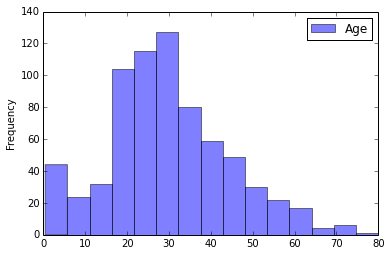

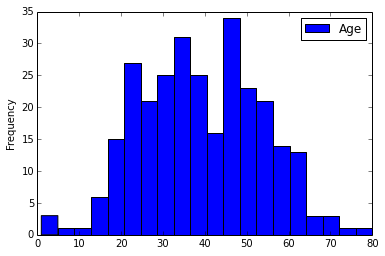

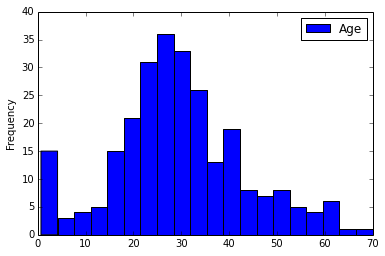

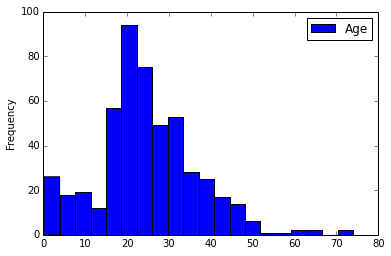

In [43]:
pd.DataFrame(data_train.ix[data_train.Survived == 1, 'Age']).plot(kind='hist', bins=15)
pd.DataFrame(data_train.ix[data_train.Survived == 0, 'Age']).plot(kind='hist', bins=15)

pd.DataFrame(data_train.Age).plot(kind='hist', bins=15, alpha=0.5)

# and lets histograms by class
pd.DataFrame(data_all.ix[data_all.Pclass == 1, 'Age']).plot(kind='hist', bins=20)
pd.DataFrame(data_all.ix[data_all.Pclass == 2, 'Age']).plot(kind='hist', bins=20)
pd.DataFrame(data_all.ix[data_all.Pclass == 3, 'Age']).plot(kind='hist', bins=20)



In [104]:
# lets try compute fare per person and build graphs based on that

per_person = lambda x: x/len(x)
data_all['FarePerPerson'] = data_all.groupby(['Ticket', 'Fare']).Fare.transform(per_person)
data_all.ix[(data_all.Fare == 19.9667) & (data_all.LastName == 'Hagland'), 'FarePerPerson'] = 19.9667/2
# zeros with mean

data_all.Fare.fillna(0, inplace=True)
data_all.Fare.isnull().any()

data_all.ix[data_all.FarePerPerson == 0, 'FarePerPerson'] = None
data_all.FarePerPerson = data_all.groupby('Pclass').FarePerPerson.transform(lambda x: x.fillna(x.mean()))


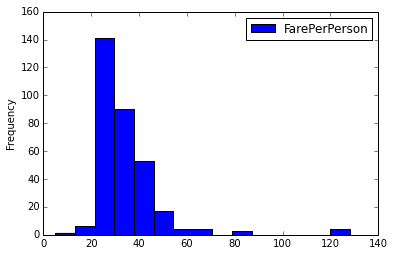

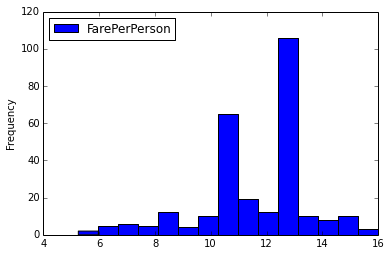

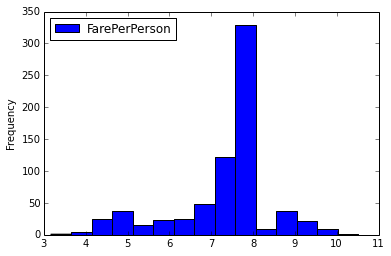

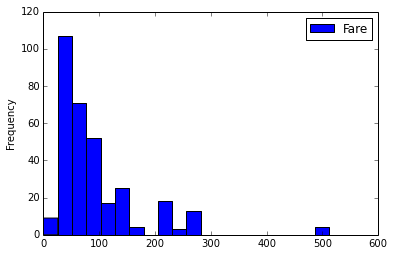

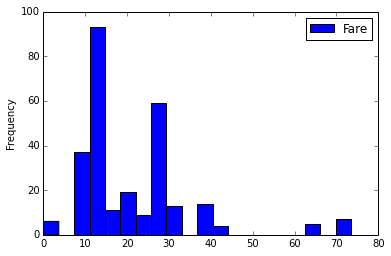

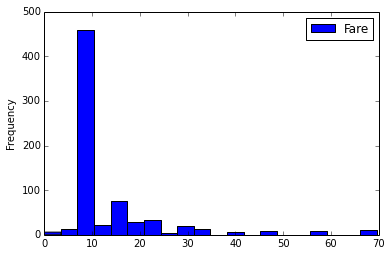

In [105]:
pd.DataFrame(data_all.ix[data_all.Pclass == 1, 'FarePerPerson']).plot(kind='hist', bins=15)
pd.DataFrame(data_all.ix[data_all.Pclass == 2, 'FarePerPerson']).plot(kind='hist', bins=15)
pd.DataFrame(data_all.ix[data_all.Pclass == 3, 'FarePerPerson']).plot(kind='hist', bins=15)
# and lets histograms by class
pd.DataFrame(data_all.ix[data_all.Pclass == 1, 'Fare']).plot(kind='hist', bins=20)
pd.DataFrame(data_all.ix[data_all.Pclass == 2, 'Fare']).plot(kind='hist', bins=20)
pd.DataFrame(data_all.ix[data_all.Pclass == 3, 'Fare']).plot(kind='hist', bins=20)

In [93]:
print data_all[(data_all.Pclass == 3) & (data_all.FarePerPerson > 13)]
# same family different tickets

          Age Cabin Embarked     Fare                                  Name  \
451  28.31891   NaN        S  19.9667       Hagland, Mr. Ingvald Olai Olsen   
490  28.31891   NaN        S  19.9667  Hagland, Mr. Konrad Mathias Reiersen   

     Parch  PassengerId  Pclass   Sex  SibSp  Survived Ticket Title  Family  \
451      0          452       3  male      1         0  65303    Mr       1   
490      0          491       3  male      1         0  65304    Mr       1   

    LastName  TitleCat  AgeCat  FamilyId  FarePerPerson  
451  Hagland         3       2       338        19.9667  
490  Hagland         3       2       338        19.9667  


Titles:
Title
Capt            70.000000
Col             54.000000
Don             40.000000
Dona            39.000000
Dr              43.571429
Jonkheer        38.000000
Lady            48.000000
Major           48.500000
Master           5.482642
Miss            21.774238
Mlle            24.000000
Mme             24.000000
Mr              32.252151
Mrs             36.994118
Ms              28.000000
Rev             41.250000
Sir             49.000000
the Countess    33.000000
Name: Age, dtype: float64


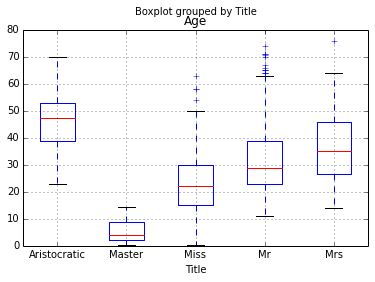

In [44]:
# extracting title

pattern = ".*, ([a-zA-Z ]*)\. .*"
data_train["Title"] = data_train.Name.str.extract(pattern)
data_test["Title"] = data_test.Name.str.extract(pattern)

data_all["Title"] = data_all.Name.str.extract(pattern)

print "Titles:"
print data_all.groupby(["Title"])['Age'].mean()

# want to preserve column order
d = OrderedDict()
d["Count"] = len
d["Missing"] = lambda x: x.isnull().sum()
d["Mean"] = np.mean
#print
#print data_train.groupby("Title")["Age"].agg(d)

# had to predict ages here!!!
# Mme = Missus (Mrs) 
# Mlle = Miss (no abbreviation, unless you use: Ms).

similar = ["Capt", "Col", "Don", "Dona", "Dr", "Jonkheer", "Lady", "Major", "Rev", "Sir", "the Countess"]
data_train.Title.replace(similar, "Aristocratic", inplace=True)
data_train.Title.replace("Ms", "Mrs", inplace=True)
data_train.Title.replace(["Mlle", "Mme"], "Miss", inplace=True)

data_test.Title.replace(similar, "Aristocratic", inplace=True)
data_test.Title.replace("Ms", "Mrs", inplace=True)
data_test["Title"].replace(["Mlle", "Mme"], "Miss", inplace=True)

data_all.Title.replace(similar, "Aristocratic", inplace=True)
data_all.Title.replace("Mlle", "Miss", inplace=True)
data_all.Title.replace("Mme", "Mrs", inplace=True)
# no husband or relatives found for those ladyes
data_all.Title.replace("Ms", "Miss", inplace=True)

dd = pd.DataFrame(data_all[["Age", "Title"]])
dd.boxplot(column="Age", by="Title")

In [45]:
from sklearn.preprocessing import LabelEncoder
def add_cat(data, col):
    enc = LabelEncoder()
    enc.fit(data[col])
    data[col + "Cat"] = enc.transform(data[col])
    
add_cat(data_train, "Title")
add_cat(data_test, "Title")

In [46]:
print data_all.groupby(['Title', 'Pclass']).Age.agg([np.mean, np.size])

fillna_with_mean = lambda x: x.fillna(x.mean())

data_all.Age = data_all.groupby(['Title', 'Pclass']).Age.transform(fillna_with_mean)

data_train.Age = data_train.groupby("Title").Age.transform(fillna_with_mean)
data_test.Age = data_test.groupby("Title").Age.transform(fillna_with_mean)


                          mean  size
Title        Pclass                 
Aristocratic 1       47.666667    19
             2       40.700000    10
Master       1        6.984000     5
             2        2.757273    11
             3        6.090000    45
Miss         1       30.131148    62
             2       20.865714    51
             3       17.360874   151
Mr           1       41.450758   159
             2       32.346715   150
             3       28.318910   448
Mrs          1       42.926471    78
             2       33.518519    55
             3       32.326531    65


           Age Cabin Embarked    Fare  \
803    0.42000   NaN        C  8.5167   
995   16.00000   NaN        C  8.5167   
1007  28.31891   NaN        C  6.4375   
1024  28.31891   NaN        C  6.4375   
1223  28.31891   NaN        C  7.2250   

                                           Name  Parch  PassengerId  Pclass  \
803             Thomas, Master. Assad Alexander      1          804       3   
995   Thomas, Mrs. Alexander (Thamine Thelma")"      1          996       3   
1007                           Thomas, Mr. John      0         1008       3   
1024                      Thomas, Mr. Charles P      0         1025       3   
1223                        Thomas, Mr. Tannous      0         1224       3   

         Sex  SibSp  Survived Ticket   Title  Family LastName  TitleCat  \
803     male      0         1   2625  Master       1   Thomas         1   
995   female      1       NaN   2625     Mrs       2   Thomas         4   
1007    male      0       NaN   2681      Mr       0 

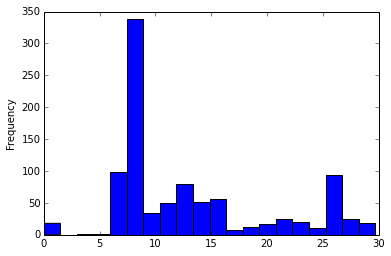

In [126]:
# lets see what we can get from fare
#print data_all.groupby(['Fare', 'LastName']).size()
from helpers import munge


munge(data_all)

data_all['Family'] = data_all.SibSp + data_all.Parch
data_all['Companions'] = data_all.groupby('Ticket').Ticket.transform(lambda x: len(x))
   
print data_all[data_all.LastName == 'Thomas']
# would start from 1 cause apply would use app twice on first group
family_id = 0
def app(group):
    global family_id
    sz = len(group)
    arr = None
    if group.Family.iloc[0] == 0:
        next_id = family_id + sz
        arr = range(family_id, next_id)
        family_id = next_id
    elif sz != group.Family.iloc[0] + 1:
        arr = sz*[None]
    else:
        arr = sz*[family_id]
        family_id += 1
    return pd.DataFrame({'FamilyId' : arr}, index=group.index)
    
def add_family_id(data):
    g = lambda x: x.groupby(['LastName', 'Family']).apply(app).FamilyId
    data['FamilyId'] = g(data)
    # didn't help
    data.ix[data.FamilyId.isnull(), 'FamilyId'] = g(data[data.FamilyId.isnull()])    

def shit(x):
    b = len(x.Fare.unique()) == 1
    if not b:
        print len(x.Fare.values), x[['Ticket', 'Pclass', 'Fare', 'Name']]
    return b

# check if alwais true that all fare equal in one ticket id
#print data_all.groupby('Ticket').apply(shit)
    
#data_all['FarePerPerson'] = data_all.groupby('Fare')
    
    
#print data_all[data_all.Ticket == '12749']
#print data_all[data_all.FamilyId.isnull()].sort_values(['Ticket', 'Fare'])[['Ticket', 'Fare', 'LastName', 'Family', 'FamilyId']]
    
add_family_id(data_all)


dd = data_all[data_all.Family > 0].groupby('FamilyId').Ticket.agg(lambda x: len(x.unique()) == 1)
print dd.all()
print dd.value_counts()
print dd[~dd]

for i in dd[~dd].index:
    print i
    print data_all[data_all.FamilyId == i]





print len(data_all[data_all.FamilyId.isnull()])
print data_all[data_all.Ticket == '364848']

print data_all[data_all.FamilyId.isnull()].groupby(['Fare', 'Family', 'Name']).size()
print data_all.ix[data_all.LastName == 'Hays']

#print data_all.ix[data_all.LastName == 'Andersson']

print len(data_all[data_all.FamilyId.isnull()])


# want to see no family Id. alone has parch
#print data_all.ix[data_all.FamilyId.isnull() & data_all.Parch != 0, ['LastName', 'Pclass', 'Fare', 'SibSp', 'Parch']]



print data_all[data_all.FamilyId.isnull()].groupby(['LastName', 'Name', 'Pclass', 'Fare']).size() 

#print data_all




print data_all[data_all.Family > 0].groupby(['LastName', 'Family']).size()

# Thamine Thelma


print data_all.ix[data_all.Fare == 8.5167, [ 'Name', 'Pclass', 'Fare', 'Parch', 'SibSp']]

print data_all.ix[data_all.LastName == 'Thelma', [ 'Name', 'Pclass', 'Fare', 'Parch', 'SibSp']]

print data_all.ix[data_all.LastName == 'Thamine', [ 'Name', 'Pclass', 'Fare', 'Parch', 'SibSp']]

print data_all.ix[data_all.LastName == 'Thomas', [ 'Name', 'Pclass', 'Fare', 'Parch', 'SibSp']]

print data_all.ix[data_all.LastName == 'Allen', [ 'Name', 'Pclass', 'Fare', 'Parch', 'SibSp']]

print data_all.ix[data_all.LastName == 'Bowen', ['Name','Pclass', 'Fare', 'Parch', 'SibSp']]

print data_all.ix[data_all.LastName == 'Bradley', ['Name','Pclass', 'Fare', 'Parch', 'SibSp']]

print data_all.ix[data_all.LastName == 'Brown', ['Name','Pclass', 'Fare', 'Parch', 'SibSp']]





# family but different class
tt = data_all.groupby(['LastName']).Pclass.agg(lambda x: len(x.unique()) == 1)
print tt[tt == False]

print data_all.Fare.isnull().any()

print data_all[ data_all.LastName == data_all.ix[data_all.Fare.idxmax(), 'LastName'] ]

#probably we are going to categorize fare as  well, or maybe not.. we will see later

d = data_all[data_all.Fare < 100]
d = d[d.Fare < 30]
d.Fare.plot(kind='hist', bins=20)




print data_all.Fare.head()

In [48]:
# fill zero fare
data_train.Fare.replace(0, None, inplace=True)
data_train.Fare = data_train.groupby("Title").Fare.apply(func)

data_test.Fare.replace(0, None, inplace=True)
data_test.Fare = data_test.groupby("Title").Fare.apply(func)

# at this point should not have 0 or NA fare
# make check
incorrect = lambda data: len(data) - data.Fare.count() != 0 or (data.Fare == 0).any()
if incorrect(data_train) or incorrect(data_test): raise Exception("data train or test Fare NA or 0 values")

NameError: name 'func' is not defined

In [ ]:
dd = pd.DataFrame(data_train[["Age", "Title"]])
dd.boxplot(column="Age", by="Title")

In [ ]:
# alive
p = data_train.groupby("Title")["Survived"].agg(lambda x: 1. * x.sum()/len(x)).plot(kind="bar")
p.set_ylim([0,1])
p

In [ ]:
# this one i should change a bit
data_train['PclassCat'] = data_train['Pclass'].astype('category')
ax = data_train.loc[data_train['Survived'] == 1].plot(kind='scatter', x='Age', y='Pclass', color='DarkBlue', label='Survived')
data_train.loc[data_train['Survived'] == 0].plot(kind='scatter', x='Age', y='Pclass', color='DarkGreen', label='Died', ax=ax)


In [ ]:
miss = len(data_train.index) - data_train.count()
h = len(miss > 0)
print
if h > 0:
    print "Missing data train set:"
    print miss[miss > 0]
else:
    print "No missing data in train set"

In [ ]:
miss = len(data_test.index) - data_test.count()
h = len(miss > 0)
print
if h > 0:
    print "Missing data test set:"
    print miss[miss > 0]
else:
    print "No missing data in test set"

In [ ]:
# add IsCabin feature
data_train['IsCabin'] = 0
data_train.loc[data_train.Cabin.notnull(), 'IsCabin'] = 1

data_test['IsCabin'] = 0
data_test.loc[data_test.Cabin.notnull(), 'IsCabin'] = 1

In [ ]:
print len(data_train[data_train.Fare.isnull()])
print len(data_test[data_test.Fare.isnull()])

In [ ]:
# find correlation between survived and fare + woman or man
print data_train[['Fare', 'Survived']].corr()

In [ ]:
yo = data_train.groupby(['Title', 'Pclass', 'Survived']).size().unstack()
yo.fillna(0, inplace=True)
print yo

In [ ]:
# working on last name
data_all['LastName'] = data_all.Name.str.extract("(.+),.+")
data_train['LastName'] = data_train.Name.str.extract("(.+),.+")
data_test['LastName'] = data_train.Name.str.extract("(.+),.+")

# find last names that survived

#from sets import Set 
s = data_train[data_train.Survived == 1].LastName.unique()
survived_lastnames = set(s)

sz = data_train.groupby('LastName', group_keys='lol').size()
for (index, value) in sz.iteritems():
    if value == 1: survived_lastnames.discard(value)

# should be 3 variants 
cond = lambda x: 1 if x in survived_lastnames else 0
data_train['RelativeSurvived'] = data_train['LastName'].apply(cond)
data_test['RelativeSurvived'] = data_test['LastName'].apply(cond)

print "Do we have null values somewhere in LastName"
print data_all.LastName.isnull().any()

In [ ]:
print data_all.groupby(['LastName', 'Pclass', 'Fare']).size()